### **0. Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### **1. Input Data**

In [2]:
uploaded = files.upload()

Saving data.txt to data.txt


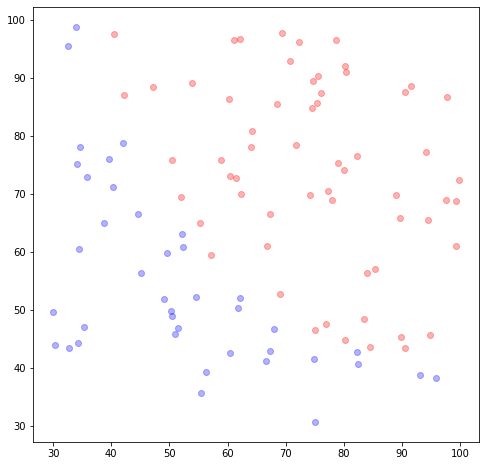

100
<class 'numpy.ndarray'>


In [14]:
data = np.genfromtxt("data.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

print(len(x)) #100
print(type(x))
#print(y_label0)
#print(type(x_label0))

### **2. Linear Regression**
1) Linear Model
<br>
$\ f_\theta(x,y,z) = \theta_0 + \theta_1x + \theta_2y  $
<br>
<br>
2) Objective Function
<br>
$\ J(\theta_0,\theta_1,\theta_2,\theta_3 ) = \frac{1}{2m} \sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} + \theta_2y^{(i)} + \theta_3z^{(i)} - h^{(i)})^2 $
<br>
<br>
3) Gradient Descent
<br>
$\ \theta_0^{(t+1)} =  \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})$
<br>
$\ \theta_1^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})x^{(i)}$
<br>
$\ \theta_2^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})y^{(i)}$
<br>
$\ \theta_3^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})z^{(i)}$
<br>
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = -10$  
$\ \theta_1^{(0)} = -20$  
$\ \theta_2^{(0)} = 10$  
$\ \theta_3^{(0)} = 20$
<br>
$\ lr = 3*10^{-4}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + math.e**-z)
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_0, theta_1, theta_2):
  cost = 0
  predictions = deque()
  for i in range(0, 100):
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i])
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log10(estimate)) - (1-class_data[i])*np.log10(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 100
  #print("Cost",i,"번째",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_0, theta_1, theta_2):
  for i in range(0, 100):
    lr = 0.01
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i]) - class_data[i]
    theta_0 -= lr * estimate / 100
    theta_1 -= lr * estimate * x_data[i] / 100
    theta_2 -= lr * estimate * y_data[i] / 100
  return theta_0, theta_1, theta_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Plotting the estimated Parameters


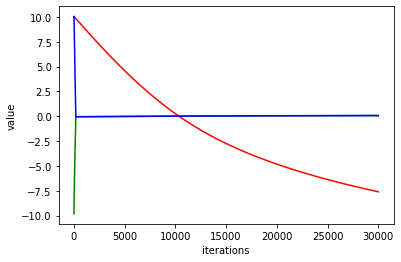

Plotting the Training Error


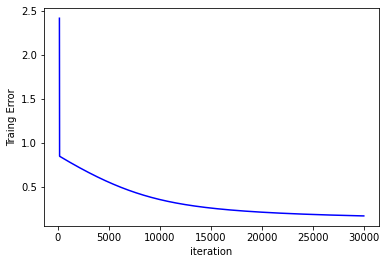

In [55]:
def main():
  theta_0,theta_1,theta_2 = 10, -10, 10  #Initialization
  train_costs = deque()
  theta_0s = deque()
  theta_1s = deque()
  theta_2s = deque()
  iters = deque()

  for iter in range(0, 30000):
    train_value = objectiveFunction(x, y, label, theta_0, theta_1, theta_2)
    theta_0, theta_1, theta_2 = gradientDescent(x, y, label, theta_0, theta_1, theta_2)
    #test_value = objectiveFunction(test_data, theta_0, theta_1, theta_2, theta_3)

    #data 수집
    iters.append(iter)
    train_costs.append(train_value)
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    theta_2s.append(theta_2)

  print("Plotting the estimated Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'r')
  graph2 = plt.plot(iters, theta_1s, 'g')
  graph3 = plt.plot(iters, theta_2s, 'b')
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()

  print("Plotting the Training Error")
  plt.plot(iters, train_costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('Traing Error')
  plt.show()

if __name__ == "__main__":
  main()

In [13]:
z = 1
result = 1/(1 + math.e**-z)
print(result)

0.7310585786300049


In [42]:
print(np.log10(0))

-inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
